# Trabajo Practico 2 - Analisis y Curación de datos

## Ulises Dascalakis

Mail : ulises.dasca@live.com.ar

## Alejandro Bernal

Mail : alejandro@alejandro.bio

# Librerias

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Realicen en esta celda los imports de librerías que necesiten

#Importamos Seaborn para dibujar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Importando data set

In [59]:
# Importamos el dataset. Así como el nombre del dataset.
# Como el dataset fue creado usando como delimitador un tab, si no lo definimos a la hora de importarlo, se va romper.
df = pd.read_csv('data/reviews_yelp_nn.csv', sep='\t')

# Análisis de consistencia/inconsistencia de Datos

### 1 Descripción de las features

#### Observaciones

- La columna "cool" tiene datos de distintos tipos, esto nos indica que tal vez debamos hacer una limpieza en esta feature
- Las columnas "stars", "useful", "funny" son de tipo númerico y parecen estar relacionadas entre si
- La columna "review_id" tiene 9 registros vacios que representan casi el 0% de la cantidad de registros

<table>
    <tr>
        <th>Feature</th>
        <th>Tipo de dato</th>
        <th>Significado</th>
    </tr>
    <tr>
        <td>review_id</td>
        <td>string</td>
        <td>id de la review</td>
    </tr>
    <tr>
        <td>user_id</td>
        <td>string</td>
        <td>id del usuario</td>
    </tr>
    <tr>
        <td>business_id</td>
        <td>string</td>
        <td>id del negocio</td>
    </tr>
    <tr>
        <td>stars</td>
        <td>float</td>
        <td>el rating recibido</td>
    </tr>
    <tr>
        <td>date</td>
        <td>fecha</td>
        <td>fecha de la review</td>
    </tr>
    <tr>
        <td>text</td>
        <td>string</td>
        <td>la review misma del negocio</td>
    </tr>
    <tr>
        <td>useful</td>
        <td>float</td>
        <td>que tan "útil" fue la review</td>
    </tr>
    <tr>
        <td>funny</td>
        <td>float</td>
        <td>que tan "divertida" fue la review</td>
    </tr>
    <tr>
        <td>cool</td>
        <td>float - string</td>
        <td>que tan "cool" fue la review</td>
    </tr>
</table>

In [60]:
### Función para análisis de datos
def describe_dataframe(dataframe):
    for feature in dataframe.columns.values:
        dataframe_unique    = dataframe.groupby(feature)[feature].nunique()
        unique_data         = dataframe_unique.min()
        data_type           = dataframe[feature].dtypes
        empty_records       = dataframe[feature].isna().sum()
        unique_records      = dataframe_unique.shape[0]
        total_records       = dataframe.shape[0]
        repeated_records    = total_records - unique_records
        print("============")
        print("Para la feature       : " + feature )
        print("")
        print("Tipo de dato          : " + str(data_type) )
        print("Cantidad de registros : " + str(total_records) )
        print("Registros duplicados  : " + str(repeated_records)  + "\t : Porcentaje : " + str(round(((repeated_records/total_records)*100), 2))   + " %")
        print("Registros vacios      : " + str(empty_records)     + "\t : Porcentaje : " + str(round(((empty_records/total_records)*100),    2))   + " %")
        print("Registros unicos      : " + str(unique_records)    + "\t : Porcentaje : " + str(round(((unique_records/total_records)*100),   2))   + " %")
        if (dataframe[feature].dtype == "float64"):
            print("")
            print("Mínimo            : " + str(dataframe[feature].min()))
            print("Máximo            : " + str(dataframe[feature].max()))
            print("Promedio          : " + str(dataframe[feature].mean()))
            print("Moda              : " + str(dataframe[feature].mode().iloc[0]))
            print("")

In [61]:
### Función para análisis de datos
describe_dataframe(df)

Para la feature       : business_id

Tipo de dato          : object
Cantidad de registros : 3342958
Registros duplicados  : 3156211	 : Porcentaje : 94.41 %
Registros vacios      : 0	 : Porcentaje : 0.0 %
Registros unicos      : 186747	 : Porcentaje : 5.59 %
Para la feature       : cool

Tipo de dato          : object
Cantidad de registros : 3342958
Registros duplicados  : 3342710	 : Porcentaje : 99.99 %
Registros vacios      : 3	 : Porcentaje : 0.0 %
Registros unicos      : 248	 : Porcentaje : 0.01 %
Para la feature       : date

Tipo de dato          : object
Cantidad de registros : 3342958
Registros duplicados  : 33660	 : Porcentaje : 1.01 %
Registros vacios      : 5	 : Porcentaje : 0.0 %
Registros unicos      : 3309298	 : Porcentaje : 98.99 %
Para la feature       : funny

Tipo de dato          : float64
Cantidad de registros : 3342958
Registros duplicados  : 3342771	 : Porcentaje : 99.99 %
Registros vacios      : 9	 : Porcentaje : 0.0 %
Registros unicos      : 187	 : Porcentaje : 0

In [62]:
#Usamos la función info de pandas para obtener info del dataframe
df.info()

#También podemos utilizar dtypes, pero esta función muestra solo los tipos de datos
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342958 entries, 0 to 3342957
Data columns (total 9 columns):
business_id    object
cool           object
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(3), object(6)
memory usage: 229.5+ MB


In [63]:
#Evaluamos si hay registros NaN
df.isnull().any()
#VEMOS QUE HAY REGISTROS NULL PARA TODOS LOS CAMPOS MENOS PARA business_id

business_id    False
cool            True
date            True
funny           True
review_id       True
stars           True
text            True
useful          True
user_id         True
dtype: bool

## 1.1 Siempre es bueno tratar de trabajar sin duplicados en un dataset, esto nos evita problemas futuros en el entrenamiento. Verifique si existen datos repetidos y proceda en consecuencia

In [64]:
##ANALIZAMOS SI TENEMOS REGISTROS REPETIDOS
##EVALUAMOS SOBRE REVIEW_ID PORQUE CONSIDERAMOS QUE DEBERÍAN SER VALORES ÚNICOS YA QUE ESTAMOS ANALIZANDO REVIEWS 
#Y NO DEBERÍA HABER DOS REVIEW CON EL MISMO ID
df_nunique = df.groupby('review_id')['review_id'].nunique()
registros_unicos = df_nunique.shape[0]
registros_totales = df.shape[0]
registros_repetidos = registros_totales - registros_unicos
print("Tenemos " + str(registros_repetidos) + " registros repetidos de un total de " + str(registros_totales))

Tenemos 9 registros repetidos de un total de 3342958


In [65]:
#COMO TAMBIÉN TENEMOS VALORES NULOS, DIMENSIONAMOS LOS DATOS QUE PERDEMOS PARA EL ANÁLISIS
registros_con_valores_nulos = len(df.isnull().values[df.isnull().values == True])
registros_totales = len(df.values)
participacion_nulos = ((registros_con_valores_nulos / registros_totales) * 100)
print('Encontramos ' + str(registros_con_valores_nulos) 
      + ' registros con valores nulos de un total de ' + str(registros_totales) + ' registros totales'
     + ' con una participación del ' + str(round(participacion_nulos, 4)) + '%')

Encontramos 73 registros con valores nulos de un total de 3342958 registros totales con una participación del 0.0022%


In [66]:
#ELIMINAMOS LOS REGISTROS CON NULOS 
df_with_values = df.dropna()
registros_totales = df_with_values.shape[0]
print("Luego de eliminar los registros nulos, nos quedan " + str(registros_totales) + ' para el análisis')

Luego de eliminar los registros nulos, nos quedan 3342943 para el análisis


In [67]:
#EVALUAREMOS SI AÚN QUEDAN REGISTROS REPETIDOS
df_nunique = df_with_values.groupby('review_id')['review_id'].nunique()
registros_unicos = df_nunique.shape[0]
registros_totales = df_with_values.shape[0]
registros_repetidos = registros_totales - registros_unicos
print("Luego de eliminar los valores nulos, tenemos " 
      + str(registros_repetidos) + " registros repetidos de un total de " + str(registros_totales))

Luego de eliminar los valores nulos, tenemos 0 registros repetidos de un total de 3342943


In [68]:
#3) CORROBORAMOS QUE NO QUEDEN VALORES NaN
df_with_values.isnull().any()

business_id    False
cool           False
date           False
funny          False
review_id      False
stars          False
text           False
useful         False
user_id        False
dtype: bool

In [69]:
#EN CONCLUSIÓN, EL 0,002% DEL DATASET FUERON DESCARTADOS POR CONTENER VALORES NULOS

In [70]:
#ANALIZAMOS NUEVAMENTE LOS TIPOS DE DATOS SOBRE EL DATASET LIMPIO
df_with_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342943 entries, 0 to 3342957
Data columns (total 9 columns):
business_id    object
cool           object
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(3), object(6)
memory usage: 255.0+ MB


In [71]:
#5) PODEMOS COMENZAR A FORZAR LOS TIPOS DE DATOS
#CONVERTIMOS LOS TIPOS DE DATOS A INT
df_with_values = df_with_values.astype({'cool': 'int32', 'funny': 'int32', 'stars': 'int32', 'useful': 'int32'})

#INTENTAMOS CONVERTIR LOS TIPOS DE DATOS OBJECT A STRING PERO VEMOS EN 
#https://pbpython.com/pandas_dtypes.html QUE LOS TIPOS DE DATOS SON EQUIVALENTE

In [72]:
df_with_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342943 entries, 0 to 3342957
Data columns (total 9 columns):
business_id    object
cool           int32
date           object
funny          int32
review_id      object
stars          int32
text           object
useful         int32
user_id        object
dtypes: int32(4), object(5)
memory usage: 204.0+ MB


In [73]:
#Corroboramos nuevamente si existen valores nulos
df_with_values.isnull().any()

business_id    False
cool           False
date           False
funny          False
review_id      False
stars          False
text           False
useful         False
user_id        False
dtype: bool

In [74]:
##ANALIZAMOS SI TENEMOS REGISTROS REPETIDOS
##EVALUAMOS SOBRE REVIEW_ID PORQUE CONSIDERAMOS QUE DEBERÍAN SER VALORES ÚNICOS YA QUE ESTAMOS ANALIZANDO REVIEWS 
#Y NO DEBERÍA HABER MÁS DE UNA REVIEW CON EL MISMO ID
df_nunique = df_with_values.groupby('review_id')['review_id'].nunique()
df_nunique.shape[0] == df_with_values.shape[0]

True

### Buscando Outliers

Text(0.5, 1.0, 'Outliers de la feature : stars ')

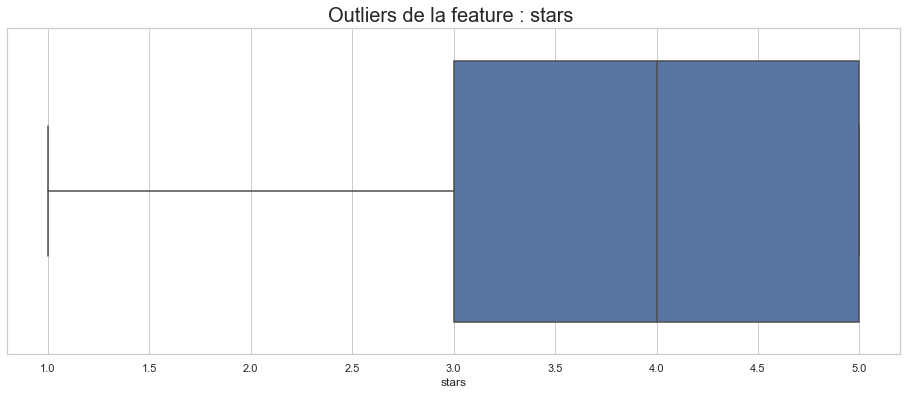

In [88]:
# Buscando outliers para la feature stars
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.boxplot(x=df_with_values["stars"]).set_title("Outliers de la feature : stars ", fontsize=20)

Text(0.5, 1.0, 'Outliers de la feature : cool')

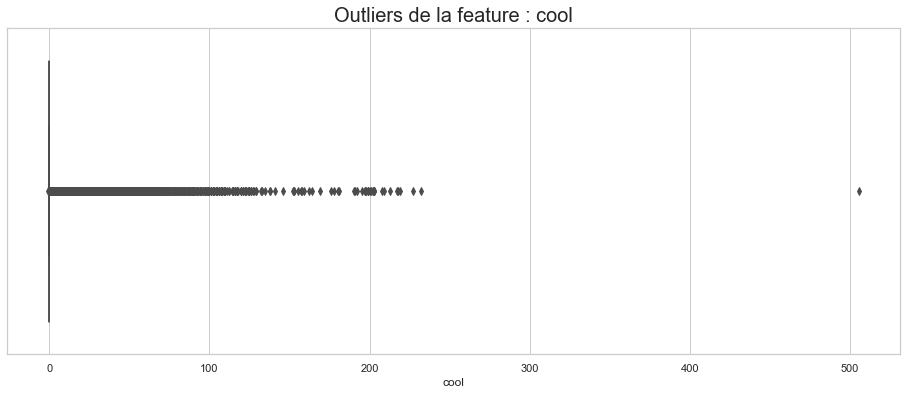

In [89]:
# Buscando outliers para la feature cool
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.boxplot(x=df_with_values["cool"]).set_title("Outliers de la feature : cool", fontsize=20)

Text(0.5, 1.0, 'Outliers de la feature : funny')

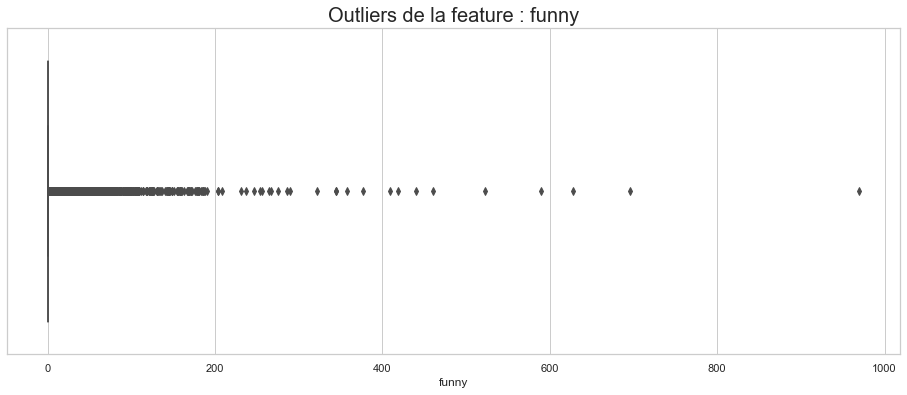

In [90]:
# Buscando outliers para la feature cool
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.boxplot(x=df_with_values["funny"]).set_title("Outliers de la feature : funny", fontsize=20)

Text(0.5, 1.0, 'Outliers de la feature : useful')

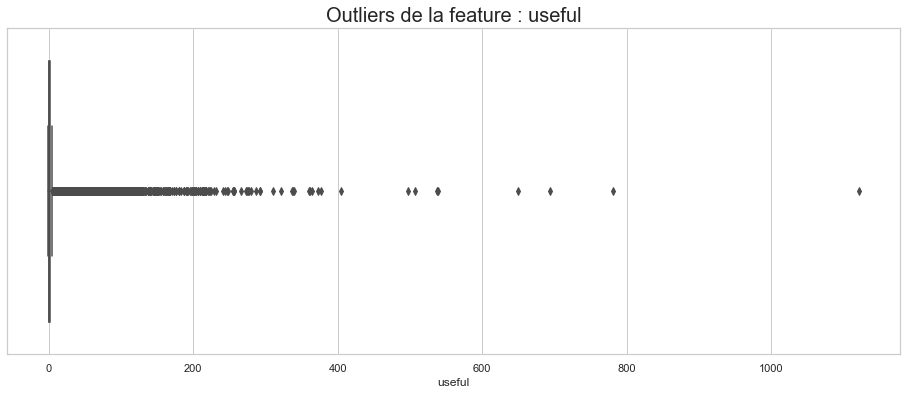

In [91]:
# Buscando outliers para la feature cool
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.boxplot(x=df_with_values["useful"]).set_title("Outliers de la feature : useful", fontsize=20)

### Distribución de los Rating

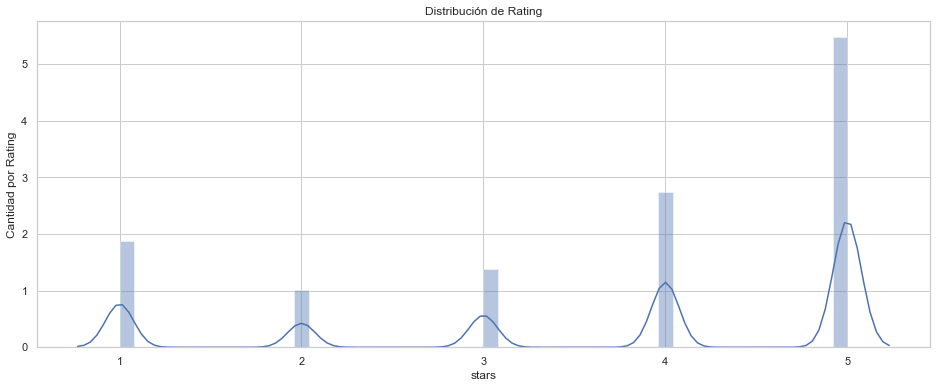

In [93]:
plt.figure(figsize=(16, 6))
plt.title('Distribución de Rating')
plt.ylabel('Cantidad por Rating')
sns.distplot(df_with_values['stars'])

In [17]:
##Exploramos correlaciones
##ESTO DEMORA DEMASIADO
#sns.pairplot(data=df_with_values[["funny", "cool", "useful", "stars"]])